In [28]:
import tensorflow as tf
print(tf.__version__)

1.12.0


# Fashion MNIST data
The Fashion MNIST data is available directly in the tf.keras datasets API

In [29]:
mnist = tf.keras.datasets.fashion_mnist 

### Training and Test set 
Calling load_data will give 2 sets of 2 lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.

In [30]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data() 

In [31]:
import matplotlib.pyplot as plt

In [32]:
print(training_labels[96])

4


[[  0   0   0   0   0   0   0   0   0  36  19  81 107 101 103  56  74 169
  124  70   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 141 209 181 198 194 196 189 167 177 167
  137 136  33   0   2   0   0   0   0   0]
 [  0   0   0   0   0   2   0  62 154  92 101 227 253 248 247 253 255  77
   63 160  92   0   2   0   0   0   0   0]
 [  0   0   0   0   0   2   0  61 114 132  75  63 183 210 208 223 130 104
  123 129  47   0   1   0   0   0   0   0]
 [  0   0   0   0   0   1   0  18 154 104 148 251  80  87 237  25  27  78
  133 114  42   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0  17 104 116 109  64  64  83  51  40  71  48
   25  36  55  12   0   0   0   0   0   0]
 [  0   0   0   0   0   0   4  42  31  21  10  18  49  44  33  57  48  42
   32  30  50  39   0   0   0   0   0   0]
 [  0   0   0   0   0   0  24  37  70  16  36  36  39  44  35  38  41  39
   32  29  40  44   0   0   0   0   0   0]
 [  0   0   0   0   0   0  38  25  70  35  33  35  38  59  41  3

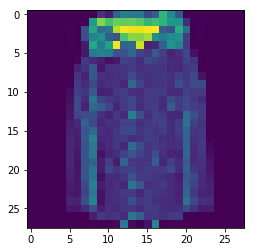

In [33]:
print(training_images[96])
plt.imshow(training_images[96])

9
#########################
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   

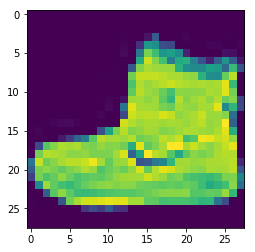

In [34]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0]) #Label is for output
print("#########################")
print(training_images[0])

## Normalizing
Doing the process of "Normalizing". As all values are between 0-255. It is easy to to scale down and treat values between 0-1


In [35]:
training_images  = training_images / 255.0 
test_images = test_images / 255.0

## Designing the Model 

In [36]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Sequential: defines a sequence of layers in the neural network

Flatten: Flatten takes square (example pixel of 28*28) and turns it into a 1 dimensional set, or a simple linear array

Dense: It defines layer of connected neurons. 

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

Relu or Rectified Linear Unit means "If X>0 return X, else return 0" -- so it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] 

There are 10 output neurons which represent 10 different labels

## Training the Model 

Now for training, Neural Network at the start has no clue about the relation. So it starts to make guess using the data available. "Loss function" measures the difference in the data and the "optimizer" figures out how to make the next guess.

In [37]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model.fit(training_images, training_labels, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.2332 - acc: 0.9125
Epoch 2/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.2244 - acc: 0.9158
Epoch 3/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.2183 - acc: 0.9182
Epoch 4/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.2121 - acc: 0.9207
Epoch 5/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.2054 - acc: 0.9226
Epoch 6/50
60000/60000 [==============================] - 6s 95us/step - loss: 0.1986 - acc: 0.9261
Epoch 7/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.1949 - acc: 0.9276
Epoch 8/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.1890 - acc: 0.9292
Epoch 9/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.1858 - acc: 0.9300
Epoch 10/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.1794 - acc: 0.9324

We train it by calling model.fit asking to fit our training data to our training labels.
Means that it figures out the relationship between the training data and its actual labels, so in future if we have more data, then it can make a prediction for what that data would look like.

We got accuracy of 96%, means it figured out a pattern between image and label that works 96% times.

## Model evaluation

In [42]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 48us/step


[0.5315462602853775, 0.8865]

Accuracy of 88%